---
---
### Lista de encabezados
1. Piezas del Vehículo:
    1: "Antiniebla delantero derecho",
    2: "Antiniebla delantero izquierdo",
    3: "Capó",
    4: "Cerradura capo",
    5: "Cerradura maletero",
    6: "Cerradura puerta",
    7: "Espejo lateral derecho",
    8: "Espejo lateral izquierdo",
    9: "Faros derecho",
    10: "Faros izquierdo",
    11: "Guardabarros delantero derecho",
    12: "Guardabarros delantero izquierdo",
    13: "Guardabarros trasero derecho",
    14: "Guardabarros trasero izquierdo",
    15: "Luz indicadora delantera derecha",
    16: "Luz indicadora delantera izquierda",
    17: "Luz indicadora trasera derecha",
    18: "Luz indicadora trasera izquierda",
    19: "Luz trasera derecho",
    20: "Luz trasera izquierdo",
    21: "Maletero",
    22: "Manija derecha",
    23: "Manija izquierda",
    24: "Marco de la ventana",
    25: "Marco de las puertas",
    26: "Moldura capó",
    27: "Moldura maletro",
    28: "Moldura puerta delantera derecha",
    29: "Moldura puerta delantera izquierda",
    30: "Moldura puerta trasera derecha",
    31: "Moldura puerta trasera izquierda",
    32: "Parabrisas delantero",
    33: "Parabrisas trasero",
    34: "Parachoques delantero",
    35: "Parachoques trasero",
    36: "Puerta delantera derecha",
    37: "Puerta delantera izquierda",
    38: "Puerta trasera derecha",
    39: "Puerta trasera izquierda",
    40: "Rejilla, parrilla",
    41: "Rueda",
    42: "Tapa de combustible",
    43: "Tapa de rueda",
    44: "Techo",
    45: "Techo corredizo",
    46: "Ventana delantera derecha",
    47: "Ventana delantera izquierda",
    48: "Ventana trasera derecha",
    49: "Ventana trasera izquierda",
    50: "Ventanilla delantera derecha",
    51: "Ventanilla delantera izquierda",
    52: "Ventanilla trasera derecha",
    53: "Ventanilla trasera izquierda"

2. Tipos de Daño:
    1: "Abolladura",
    2: "Deformación",
    3: "Desprendimiento",
    4: "Fractura",
    5: "Rayón",
    6: "Rotura"

3. Sugerencia:
    1:"Reparar", 
    2:"Reemplazar"

### Librerias necesarias:

- pip install pandas
- pip install scikit-learn
- pip install matplotlib
- pip install seaborn
- pip install torch torchvision torchaudio
- pip install tensorboard

pip install pandas scikit-learn imblearn seaborn torch torchvision

In [1]:
import pandas as pd
import ast
from collections import defaultdict
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

1. Diccionarios completos: Todos los mapeos completos para piezas, daños y sugerencias.

In [2]:
# =============================================
# 1. DICCIONARIOS COMPLETOS DE MAPEO (CORREGIDOS)
# =============================================
label_to_cls_piezas = {
    1: "Antiniebla delantero derecho",
    2: "Antiniebla delantero izquierdo",
    3: "Capó",
    4: "Cerradura capo",
    5: "Cerradura maletero",
    6: "Cerradura puerta",
    7: "Espejo lateral derecho",
    8: "Espejo lateral izquierdo",
    9: "Faros derecho",
    10: "Faros izquierdo",
    11: "Guardabarros delantero derecho",
    12: "Guardabarros delantero izquierdo",
    13: "Guardabarros trasero derecho",
    14: "Guardabarros trasero izquierdo",
    15: "Luz indicadora delantera derecha",
    16: "Luz indicadora delantera izquierda",
    17: "Luz indicadora trasera derecha",
    18: "Luz indicadora trasera izquierda",
    19: "Luz trasera derecho",
    20: "Luz trasera izquierdo",
    21: "Maletero",
    22: "Manija derecha",
    23: "Manija izquierda",
    24: "Marco de la ventana",
    25: "Marco de las puertas",
    26: "Moldura capó",
    27: "Moldura puerta delantera derecha",
    28: "Moldura puerta delantera izquierda",
    29: "Moldura puerta trasera derecha",
    30: "Moldura puerta trasera izquierda",
    31: "Parabrisas delantero",
    32: "Parabrisas trasero",
    33: "Parachoques delantero",
    34: "Parachoques trasero",
    35: "Puerta delantera derecha",
    36: "Puerta delantera izquierda",
    37: "Puerta trasera derecha",
    38: "Puerta trasera izquierda",
    39: "Rejilla, parrilla",
    40: "Rueda",
    41: "Tapa de combustible",
    42: "Tapa de rueda",
    43: "Techo",
    44: "Techo corredizo",
    45: "Ventana delantera derecha",
    46: "Ventana delantera izquierda",
    47: "Ventana trasera derecha",
    48: "Ventana trasera izquierda",
    49: "Ventanilla delantera derecha",
    50: "Ventanilla delantera izquierda",
    51: "Ventanilla trasera derecha",
    52: "Ventanilla trasera izquierda"
}

# Diccionario para Tipos de Daño (completo)
label_to_cls_danos = {
    1: "Abolladura",
    2: "Deformación",
    3: "Desprendimiento",
    4: "Fractura",
    5: "Rayón",
    6: "Rotura"
}

# Diccionario para Sugerencia (completo)
label_to_cls_sugerencia = {
    1: "Reparar",
    2: "Reemplazar"
}

In [3]:
# Crear diccionarios inversos (texto -> número) 
cls_to_label_piezas = {v.lower().strip(): k for k, v in label_to_cls_piezas.items()}
cls_to_label_danos = {v.lower().strip(): k for k, v in label_to_cls_danos.items()}
cls_to_label_sugerencia = {v.lower().strip(): k for k, v in label_to_cls_sugerencia.items()}

2. Procesamiento robusto:
    - Limpieza de texto (minúsculas, eliminar espacios)
    - Manejo de valores compuestos (ej. "Abolladura-dent")
    - Manejo de errores y valores no encontrados

In [4]:
# =============================================
# 2. FUNCIONES DE PROCESAMIENTO
# =============================================

def limpiar_texto(texto):
    """Limpia y estandariza el texto para comparación"""
    if pd.isna(texto):
        return ""
    return texto.lower().strip()

def procesar_dano(texto):
    """Procesa la columna Tipos de Daño (maneja casos como 'Abolladura-dent')"""
    texto = limpiar_texto(texto)
    if '-' in texto:
        return texto.split('-')[0]
    return texto

def mapear_valor(texto, diccionario, columna):
    """Mapea texto a valor numérico con manejo de errores"""
    try:
        texto = limpiar_texto(texto)
        if columna == 'Tipos de Daño':
            texto = procesar_dano(texto)
        return diccionario.get(texto, -1)  # -1 para valores no encontrados
    except Exception as e:
        print(f"Error procesando valor: {texto} - {str(e)}")
        return -1

In [5]:
# Leer el archivo original
df = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145.csv', sep='|')

In [6]:
df.head()

,Imagen,Tipos de Daño,Piezas del Vehículo,Sugerencia
0,1.jpg,Abolladura,Guardabarros delantero derecho,Reparar
1,2.jpg,Abolladura,Parachoques trasero,Reparar
2,3.jpg,Rayón,Parachoques delantero,Reparar
3,4.jpg,Rotura,Rueda,Reparar
4,5.jpg,Rotura,Parabrisas trasero,Reemplazar


In [7]:
# =============================================
# 3. PROCESAR EL ARCHIVO CSV
# =============================================

# Aplicar el mapeo a cada columna
df['Tipos de Daño_encoded'] = df['Tipos de Daño'].apply(
    lambda x: mapear_valor(x, cls_to_label_danos, 'Tipos de Daño'))
df['Piezas del Vehículo_encoded'] = df['Piezas del Vehículo'].apply(
    lambda x: mapear_valor(x, cls_to_label_piezas, 'Piezas del Vehículo'))
df['Sugerencia_encoded'] = df['Sugerencia'].apply(
    lambda x: mapear_valor(x, cls_to_label_sugerencia, 'Sugerencia'))

# Verificar valores no mapeados (-1)
for col in ['Tipos de Daño', 'Piezas del Vehículo', 'Sugerencia']:
    no_encontrados = df[df[f'{col}_encoded'] == -1][col].unique()
    if len(no_encontrados) > 0:
        print(f"\nADVERTENCIA: Valores no mapeados en {col}:")
        print(no_encontrados)

In [8]:
df.head(12)

,Imagen,Tipos de Daño,Piezas del Vehículo,Sugerencia,Tipos de Daño_encoded,Piezas del Vehículo_encoded,Sugerencia_encoded
0,1.jpg,Abolladura,Guardabarros delantero derecho,Reparar,1,11,1
1,2.jpg,Abolladura,Parachoques trasero,Reparar,1,34,1
2,3.jpg,Rayón,Parachoques delantero,Reparar,5,33,1
3,4.jpg,Rotura,Rueda,Reparar,6,40,1
4,5.jpg,Rotura,Parabrisas trasero,Reemplazar,6,32,2
5,6.jpg,Rayón,Parachoques trasero,Reparar,5,34,1
6,7.jpg,Rotura,Parabrisas delantero,Reemplazar,6,31,2
7,8.jpg,Rotura,Parabrisas delantero,Reemplazar,6,31,2
8,9.jpg,Deformación,Capó,Reparar,2,3,1
9,9.jpg,Deformación,Guardabarros delantero izquierdo,Reparar,2,12,1


In [9]:
# =============================================
# 4. CREAR NUEVO CSV CON ETIQUETAS
# =============================================
### Implementación técnica:
# Seleccionar y renombrar columnas
df_encoded = df[[
    'Imagen',
    'Tipos de Daño_encoded',
    'Piezas del Vehículo_encoded',
    'Sugerencia_encoded'
]].rename(columns={
    'Tipos de Daño_encoded': 'dannos',
    'Piezas del Vehículo_encoded': 'partes',
    'Sugerencia_encoded': 'sugerencias'
})

# Guardar el nuevo archivo CSV
## f_encoded.to_csv('../data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_encoded.csv', index=False, sep='|')
df_encoded.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_encoded.csv', index=False, sep='|')


print("\nProceso completado exitosamente!")
print(f"Archivo original: {len(df)} registros")
print(f"Archivo codificado: {len(df_encoded)} registros")
print("Nuevo archivo guardado como: data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_encoded.csv")


Proceso completado exitosamente!
Archivo original: 1832 registros
Archivo codificado: 1832 registros
Nuevo archivo guardado como: data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_encoded.csv


In [10]:
df_encoded.head(15)

,Imagen,dannos,partes,sugerencias
0,1.jpg,1,11,1
1,2.jpg,1,34,1
2,3.jpg,5,33,1
3,4.jpg,6,40,1
4,5.jpg,6,32,2
5,6.jpg,5,34,1
6,7.jpg,6,31,2
7,8.jpg,6,31,2
8,9.jpg,2,3,1
9,9.jpg,2,12,1


In [11]:
# Manejar imágenes con múltiples registros (como 9.jpg, 15.jpg)
# Agrupamos por imagen y consolidamos las etiquetas
def consolidar_etiquetas(group):
    result = {
        'Tipos de Daño': [],
        'Piezas del Vehículo': [],
        'Sugerencia': []
    }
    
    for col in result.keys():
        ## unique_values = group[col].dropna().unique()
        unique_values = group[col].dropna()
        result[col] = unique_values.tolist()
    
    return pd.Series(result)

df_consolidado_etiquetas = (
    df.groupby('Imagen', group_keys=False)
    [['Tipos de Daño', 'Piezas del Vehículo', 'Sugerencia']]  # Selección explícita de columnas
    .apply(consolidar_etiquetas)
    .reset_index()
)
# Guardar el nuevo archivo CSV
## df_consolidado_etiquetas.to_csv('../data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas.csv', index=False, sep='|')
df_consolidado_etiquetas.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas.csv', index=False, sep='|')

In [12]:
df_consolidado_etiquetas.head()

,Imagen,Tipos de Daño,Piezas del Vehículo,Sugerencia
0,1.jpg,[Abolladura],[Guardabarros delantero derecho ],[Reparar]
1,10.jpg,[Rotura],[Parabrisas delantero],[Reemplazar]
2,100.jpg,"[Deformación, Rotura, Rotura]","[Guardabarros delantero derecho , Faros derech...","[Reparar, Reemplazar, Reparar]"
3,1000.jpg,[Rayón],[Parachoques delantero],[Reparar]
4,1001.jpg,"[Abolladura, Fractura, Rotura]","[Maletero, Parachoques trasero, Luz trasera iz...","[Reparar, Reparar, Reemplazar]"


In [13]:
# Manejar imágenes con múltiples registros (como 9.jpg, 15.jpg)
# Agrupamos por imagen y consolidamos las etiquetas
def consolidar_etiquetas(group):
    result = {
        'dannos': [],
        'partes': [],
        'sugerencias': []
    }
    
    for col in result.keys():
        ## unique_values = group[col].dropna().unique()
        unique_values = group[col].dropna()
        result[col] = unique_values.tolist()
    
    return pd.Series(result)

df_consolidado_encoded = (
    df_encoded.groupby('Imagen', group_keys=False)
    [['dannos', 'partes', 'sugerencias']]  # Selección explícita de columnas
    .apply(consolidar_etiquetas)
    .reset_index()
)

# Guardar el nuevo archivo CSV
## df_consolidado_encoded.to_csv('../data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas_encoded.csv', index=False, sep='|')
df_consolidado_encoded.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas_encoded.csv', index=False, sep='|')

In [14]:
df_consolidado_encoded.head()

,Imagen,dannos,partes,sugerencias
0,1.jpg,[1],[11],[1]
1,10.jpg,[6],[31],[2]
2,100.jpg,"[2, 6, 6]","[11, 9, 33]","[1, 2, 1]"
3,1000.jpg,[5],[33],[1]
4,1001.jpg,"[1, 4, 6]","[21, 34, 20]","[1, 1, 2]"


In [18]:
# Antes de crear el Dataset, verifica datos inconsistentes
def check_data_consistency(df):
    # Verificar partes no definidas
    undefined_parts = set()
    for parts_list in df['partes']:
        for part in parts_list:
            if part not in cls_to_label_piezas:
                undefined_parts.add(part)
    
    # Verificar daños no definidos
    undefined_damages = set()
    for damages_list in df['dannos']:
        for damage in damages_list:
            if damage not in cls_to_label_danos:
                undefined_damages.add(damage)
    
    # Verificar sugerencias no definidas
    undefined_suggestions = set()
    for suggestions_list in df['sugerencias']:
        for sug in suggestions_list:
            if sug not in cls_to_label_sugerencia:
                undefined_suggestions.add(sug)
    
    print("\nPartes no definidas encontradas:", undefined_parts)
    print("Daños no definidos encontrados:", undefined_damages)
    print("Sugerencias no definidas encontradas:", undefined_suggestions)

In [19]:
check_data_consistency(df_consolidado_encoded)


Partes no definidas encontradas: {1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 45, 46, 47, 48, 50, 51, 52}
Daños no definidos encontrados: {1, 2, 3, 4, 5, 6}
Sugerencias no definidas encontradas: {1, 2}


In [15]:
# Leer el archivo encoded
df_consolidado_encoded = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_etiquetas_encoded.csv', sep='|')

In [16]:
df_consolidado_encoded.head()

,Imagen,dannos,partes,sugerencias
0,1.jpg,[1],[11],[1]
1,10.jpg,[6],[31],[2]
2,100.jpg,"[2, 6, 6]","[11, 9, 33]","[1, 2, 1]"
3,1000.jpg,[5],[33],[1]
4,1001.jpg,"[1, 4, 6]","[21, 34, 20]","[1, 1, 2]"


In [17]:
# =============================================
# Convertir string a lista
# =============================================
def convert_string_lists(df):
    # Aplicar literal_eval a las columnas relevantes
    df['partes'] = df['partes'].apply(ast.literal_eval)
    df['dannos'] = df['dannos'].apply(ast.literal_eval)
    df['sugerencias'] = df['sugerencias'].apply(ast.literal_eval)
    return df

# Aplicar a todos tus datasets
multi_consolidado_encoded = convert_string_lists(df_consolidado_encoded)

In [18]:
multi_consolidado_encoded.head()

,Imagen,dannos,partes,sugerencias
0,1.jpg,[1],[11],[1]
1,10.jpg,[6],[31],[2]
2,100.jpg,"[2, 6, 6]","[11, 9, 33]","[1, 2, 1]"
3,1000.jpg,[5],[33],[1]
4,1001.jpg,"[1, 4, 6]","[21, 34, 20]","[1, 1, 2]"


In [19]:
# Guardar el nuevo archivo CSV
## multi_consolidado_encoded.to_csv('../data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_multi_consolidado_encoded.csv', index=False, sep='|')
multi_consolidado_encoded.to_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_multi_consolidado_encoded.csv', index=False, sep='|')

In [ ]:
check_data_consistency(multi_consolidado_encoded)

In [73]:
# Configuración
SEED = 42
TEST_SIZE = 0.2  # 20% para prueba
VAL_SIZE = 0.25  # 25% del entrenamiento para validación (20% del total)

# Leer el archivo encoded
df_consolidado_encoded = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_multi_consolidado_encoded.csv', sep='|')

In [ ]:
# Se verifica las etiquetas únicas en los datos 
print("Partes únicas en los datos:", df_consolidado_encoded['partes'].unique())
print("Daños únicos en los datos:", df_consolidado_encoded['dannos'].unique())
print("Sugerencias únicas en los datos:", df_consolidado_encoded['sugerencias'].unique())

Dividir los datos

In [ ]:
# Primero dividimos en entrenamiento+validación (80%) y prueba (20%)
train_val_df, test_df = train_test_split(
    df_consolidado_encoded,
    test_size=TEST_SIZE,
    random_state=SEED,
    stratify=df_consolidado_encoded['sugerencias'].apply(lambda x: x[0])  # Estratificar por primera sugerencia
)

In [76]:
# Luego dividimos el entrenamiento en entrenamiento (60%) y validación (20%)
train_df, val_df = train_test_split(
    train_val_df,
    test_size=VAL_SIZE/(1-TEST_SIZE),  # Ajustar para que sea 20% del total
    random_state=SEED,
    stratify=train_val_df['sugerencias'].apply(lambda x: x[0])
)

In [ ]:
print(train_val_df.info())
print(test_df.info())
print(train_val_df.describe())
print(test_df.describe())

print(train_df.info())
print(val_df.info())
print(train_df.describe())
print(val_df.describe())

In [78]:
# 5. Guardar los conjuntos de datos
os.makedirs('data/fotos_siniestros/datasets', exist_ok=True)

train_df.to_csv('data/fotos_siniestros/datasets/multi_train.csv', index=False, sep='|')
val_df.to_csv('data/fotos_siniestros/datasets/multi_val.csv', index=False, sep='|')
test_df.to_csv('data/fotos_siniestros/datasets/multi_test.csv', index=False, sep='|')

Graficos y analisis

For generating important graphs including a confusion matrix:

    - Since this is a multi-label problem, a standard confusion matrix for single-label classification won't directly apply.
    We can generate:
    - Distribution plots of labels (parts, damages, suggestions) to understand class balance.
    - Multi-label confusion matrices or per-class confusion matrices if predictions are available.
    - Other useful plots like label co-occurrence heatmaps, bar charts of label frequencies.
    - The notebook currently does not show model training or predictions, so confusion matrix code would require predicted labels and true labels.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
# Label maps from your notebook
label_to_cls_piezas = {
    1: "Antiniebla delantero derecho",
    2: "Antiniebla delantero izquierdo",
    3: "Capó",
    4: "Cerradura capo",
    5: "Cerradura maletero",
    6: "Cerradura puerta",
    7: "Espejo lateral derecho",
    8: "Espejo lateral izquierdo",
    9: "Faros derecho",
    10: "Faros izquierdo",
    11: "Guardabarros delantero derecho",
    12: "Guardabarros delantero izquierdo",
    13: "Guardabarros trasero derecho",
    14: "Guardabarros trasero izquierdo",
    15: "Luz indicadora delantera derecha",
    16: "Luz indicadora delantera izquierda",
    17: "Luz indicadora trasera derecha",
    18: "Luz indicadora trasera izquierda",
    19: "Luz trasera derecho",
    20: "Luz trasera izquierdo",
    21: "Maletero",
    22: "Manija derecha",
    23: "Manija izquierda",
    24: "Marco de la ventana",
    25: "Marco de las puertas",
    26: "Moldura capó",
    27: "Moldura puerta delantera derecha",
    28: "Moldura puerta delantera izquierda",
    29: "Moldura puerta trasera derecha",
    30: "Moldura puerta trasera izquierda",
    31: "Parabrisas delantero",
    32: "Parabrisas trasero",
    33: "Parachoques delantero",
    34: "Parachoques trasero",
    35: "Puerta delantera derecha",
    36: "Puerta delantera izquierda",
    37: "Puerta trasera derecha",
    38: "Puerta trasera izquierda",
    39: "Rejilla, parrilla",
    40: "Rueda",
    41: "Tapa de combustible",
    42: "Tapa de rueda",
    43: "Techo",
    44: "Techo corredizo",
    45: "Ventana delantera derecha",
    46: "Ventana delantera izquierda",
    47: "Ventana trasera derecha",
    48: "Ventana trasera izquierda",
    49: "Ventanilla delantera derecha",
    50: "Ventanilla delantera izquierda",
    51: "Ventanilla trasera derecha",
    52: "Ventanilla trasera izquierda"
}

label_to_cls_danos = {
    1: "Abolladura",
    2: "Deformación",
    3: "Desprendimiento",
    4: "Fractura",
    5: "Rayón",
    6: "Rotura"
}

label_to_cls_sugerencia = {
    1: "Reparar",
    2: "Reemplazar"
}

In [15]:
def convert_string_lists(df):
    for col in ['dannos', 'partes', 'sugerencias']:
        df[col] = df[col].apply(ast.literal_eval)
    return df

In [16]:
def plot_label_distribution(df, column, label_map, title):
    all_labels = []
    for labels_list in df[column]:
        all_labels.extend(labels_list)
    label_counts = pd.Series(all_labels).value_counts().sort_index()
    label_names = [label_map.get(i, f"Label {i}") for i in label_counts.index]
    plt.figure(figsize=(12,6))
    sns.barplot(x=label_names, y=label_counts.values, palette="viridis")
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel("Cantidad de ocurrencias")
    plt.xlabel("Etiquetas")
    plt.tight_layout()
    plt.show()

In [21]:
# Load datasets de entrenamiento
train_df = pd.read_csv('data/fotos_siniestros/datasets/multi_train.csv', sep='|')
val_df = pd.read_csv('data/fotos_siniestros/datasets/multi_val.csv', sep='|')
test_df = pd.read_csv('data/fotos_siniestros/datasets/multi_test.csv', sep='|')

# Convert string lists to actual lists
train_df = convert_string_lists(train_df)
val_df = convert_string_lists(val_df)
test_df = convert_string_lists(test_df)

/tmp/ipykernel_32961/3363836751.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette="viridis")


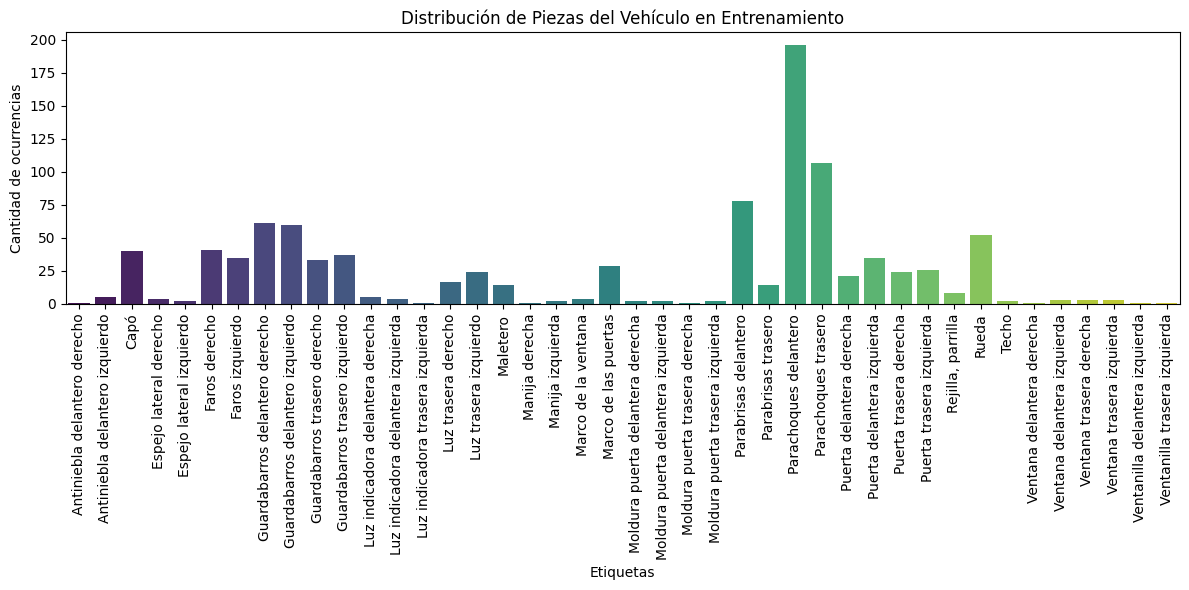

/tmp/ipykernel_32961/3363836751.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette="viridis")


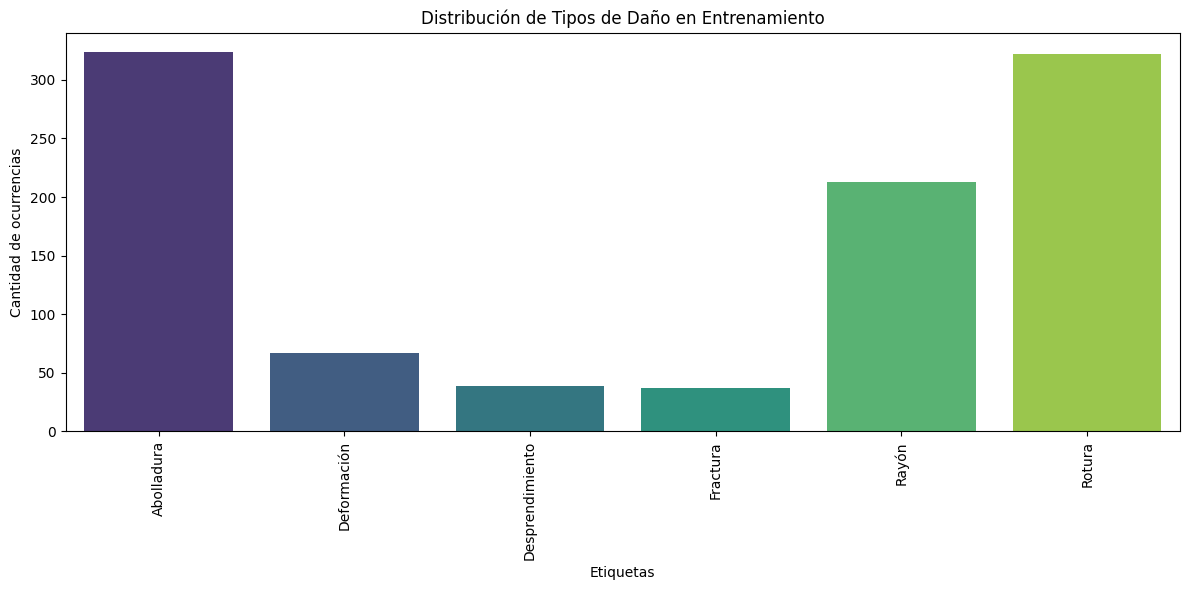

/tmp/ipykernel_32961/3363836751.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette="viridis")


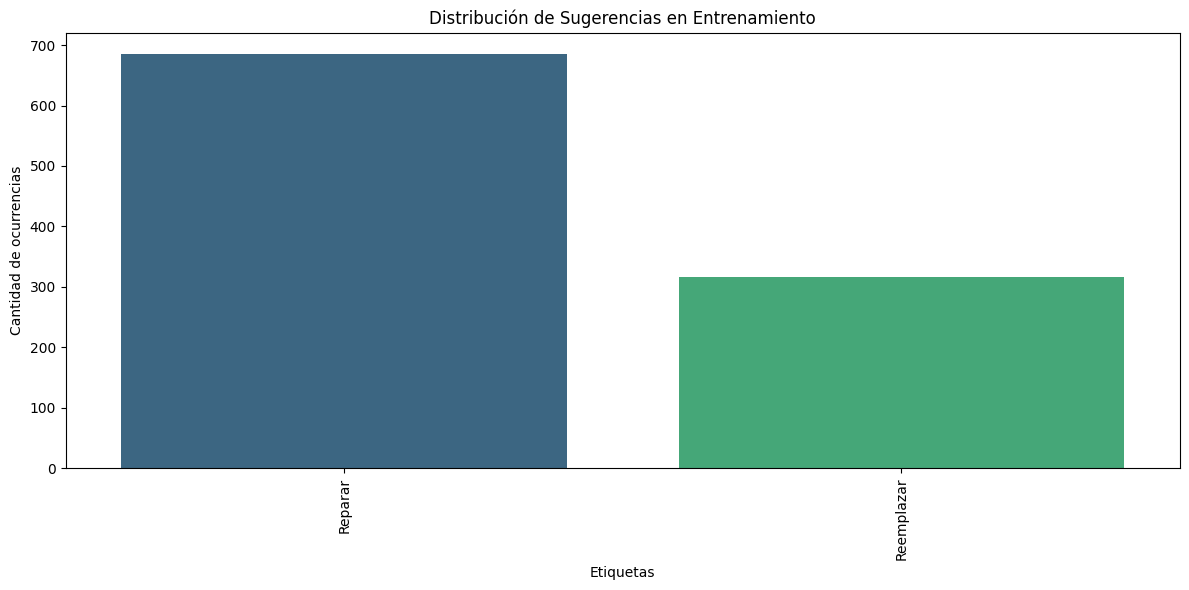

In [ ]:
# Plot label distributions for training set
plot_label_distribution(train_df, 'partes', label_to_cls_piezas, "Distribución de Piezas del Vehículo en Entrenamiento")
plot_label_distribution(train_df, 'dannos', label_to_cls_danos, "Distribución de Tipos de Daño en Entrenamiento")
plot_label_distribution(train_df, 'sugerencias', label_to_cls_sugerencia, "Distribución de Sugerencias en Entrenamiento")

/tmp/ipykernel_32961/3363836751.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette="viridis")


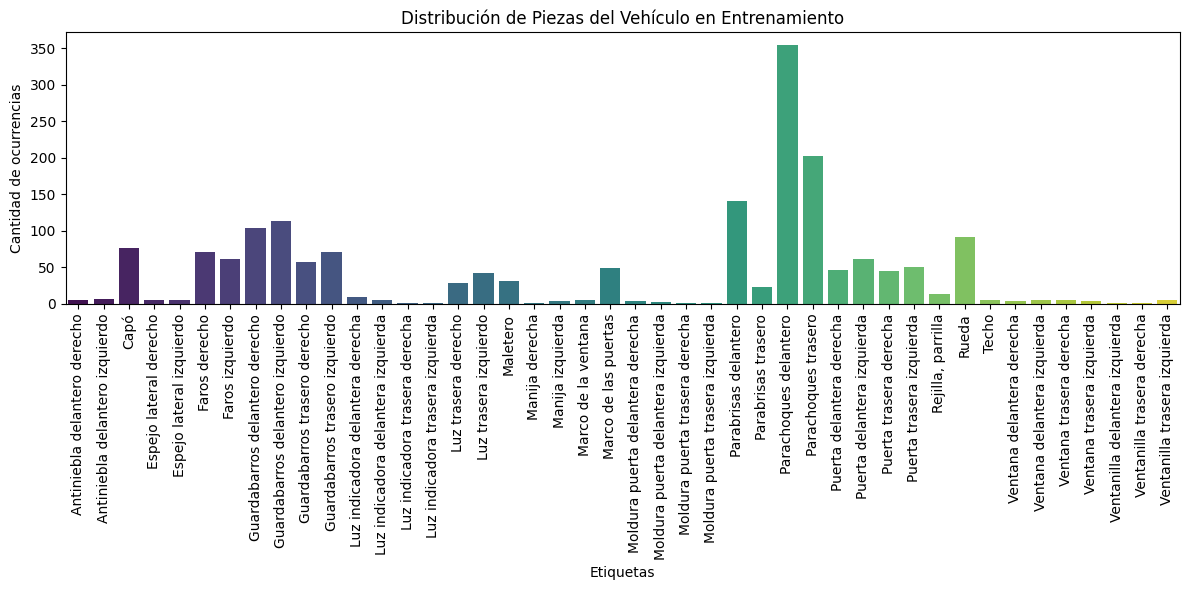

/tmp/ipykernel_32961/3363836751.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette="viridis")


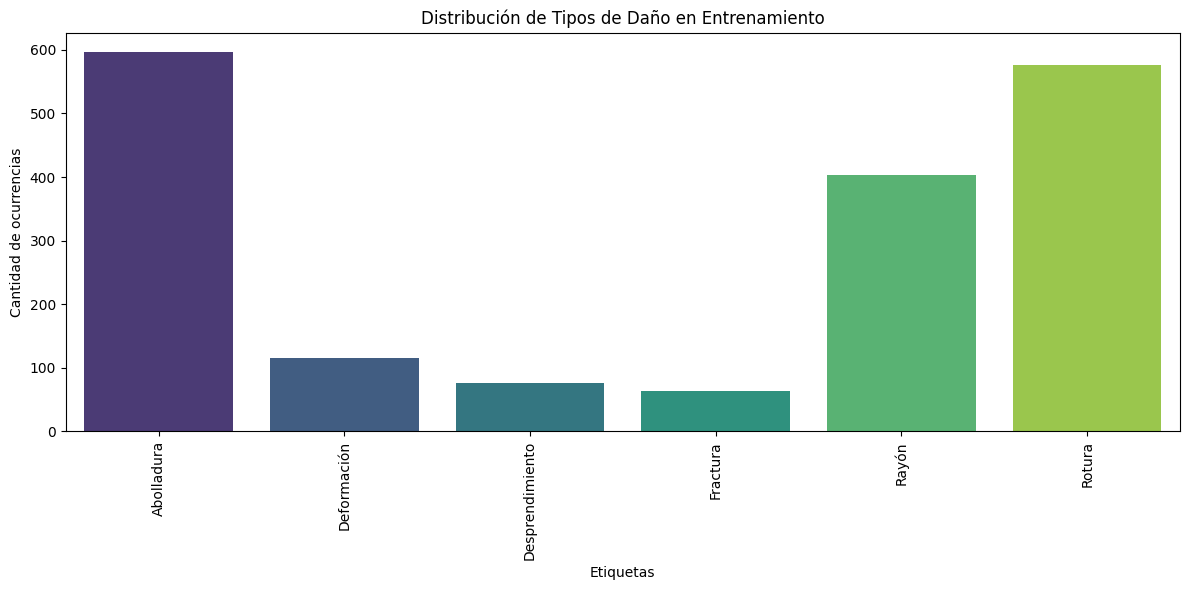

/tmp/ipykernel_32961/3363836751.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette="viridis")


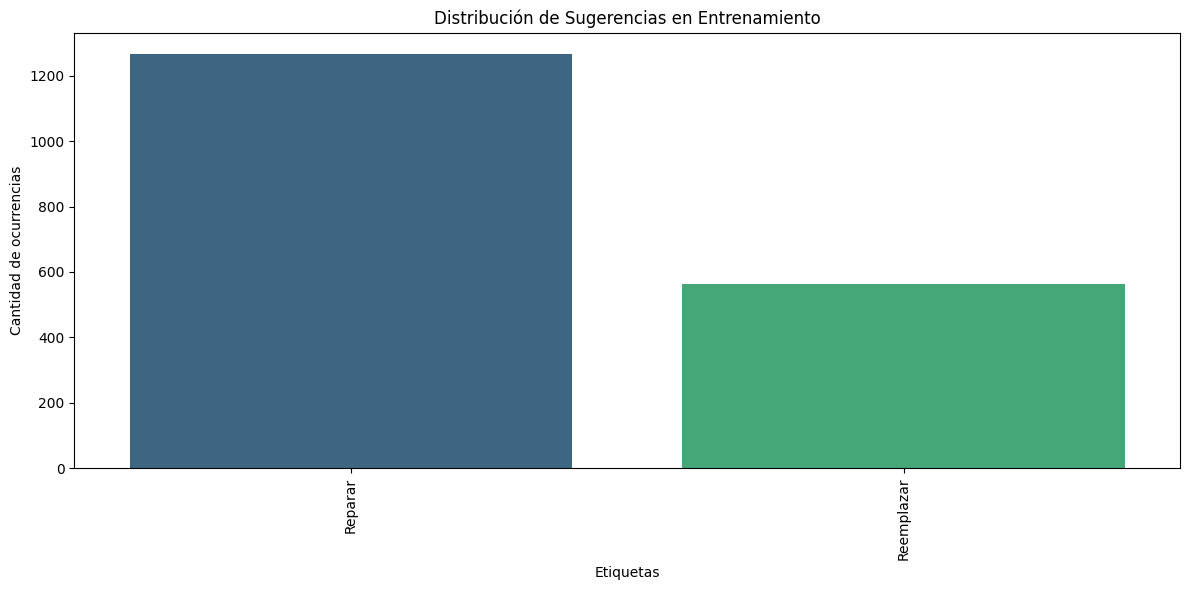

In [22]:
# # Load datasets completo
multi_encoded_df = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_multi_consolidado_encoded.csv', sep='|')

# Convert string lists to actual lists
multi_encoded_df = convert_string_lists(multi_encoded_df)

# Plot label distributions for training set
plot_label_distribution(multi_encoded_df, 'partes', label_to_cls_piezas, "Distribución de Piezas del Vehículo en Entrenamiento")
plot_label_distribution(multi_encoded_df, 'dannos', label_to_cls_danos, "Distribución de Tipos de Daño en Entrenamiento")
plot_label_distribution(multi_encoded_df, 'sugerencias', label_to_cls_sugerencia, "Distribución de Sugerencias en Entrenamiento")

Exhaustive analysis of class distributions for multi-label dataset categories: Tipos de Daño, Piezas del Vehículo y Sugerencia.

In [27]:
def plot_class_distribution(df, column, label_map, title):
    """
    Plot bar and pie charts for class distribution in multi-label data.
    df: DataFrame with multi-label column (list of labels)
    column: column name
    label_map: dict mapping label ids to names
    title: plot title
    """
    # Flatten all labels
    all_labels = []
    for labels_list in df[column]:
        all_labels.extend(labels_list)
    label_counts = pd.Series(all_labels).value_counts().sort_index()
    label_names = [label_map.get(i, f"Label {i}") for i in label_counts.index]

    # Bar plot
    plt.figure(figsize=(14,6))
    sns.barplot(x=label_names, y=label_counts.values, palette="coolwarm")
    plt.xticks(rotation=90)
    plt.title(f"{title} - Conteo de Clases")
    plt.ylabel("Número de ocurrencias")
    plt.xlabel("Clases")
    plt.tight_layout()
    plt.show()

    # Pie chart
    plt.figure(figsize=(8,8))
    plt.pie(label_counts.values, labels=label_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm", len(label_counts)))
    plt.title(f"{title} - Proporción de Clases")
    plt.axis('equal')
    plt.show()

    # Print imbalance info
    total = label_counts.sum()
    print(f"Total etiquetas en {title}: {total}")
    print("Distribución de clases (porcentaje):")
    for name, count in zip(label_names, label_counts.values):
        print(f"  {name}: {count} ({count/total:.2%})")

def exhaustive_class_distribution_analysis(train_df, label_to_cls_piezas, label_to_cls_danos, label_to_cls_sugerencia):
    print("Análisis exhaustivo de distribución de clases para el conjunto de entrenamiento\n")

    plot_class_distribution(train_df, 'partes', label_to_cls_piezas, "Piezas del Vehículo")
    plot_class_distribution(train_df, 'dannos', label_to_cls_danos, "Tipos de Daño")
    plot_class_distribution(train_df, 'sugerencias', label_to_cls_sugerencia, "Sugerencias")

    print("\nConsideraciones para manejo de desbalanceo:")
    print("- Técnicas de sobremuestreo (SMOTE, ADASYN)")
    print("- Técnicas de submuestreo")
    print("- Ajuste de pesos en la función de pérdida")
    print("- Uso de métricas adecuadas para datos desbalanceados (F1-score, AUC-PR)")

Análisis exhaustivo de distribución de clases para el conjunto de entrenamiento



/tmp/ipykernel_32961/1740670170.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette="coolwarm")


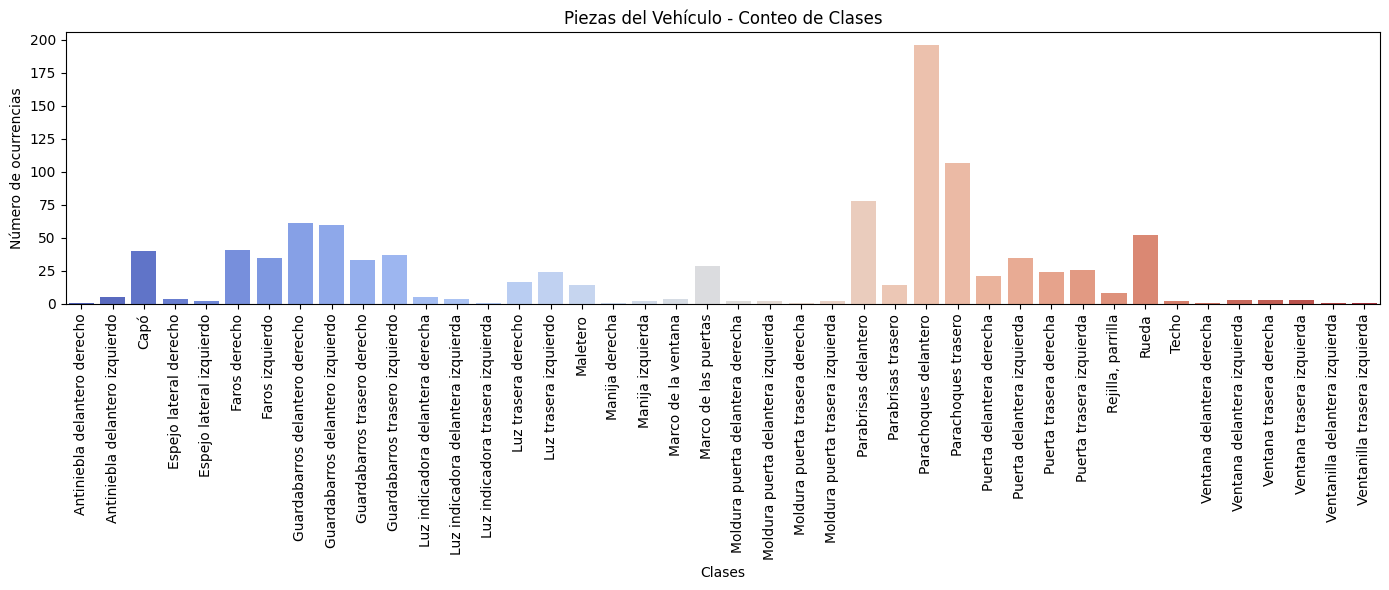

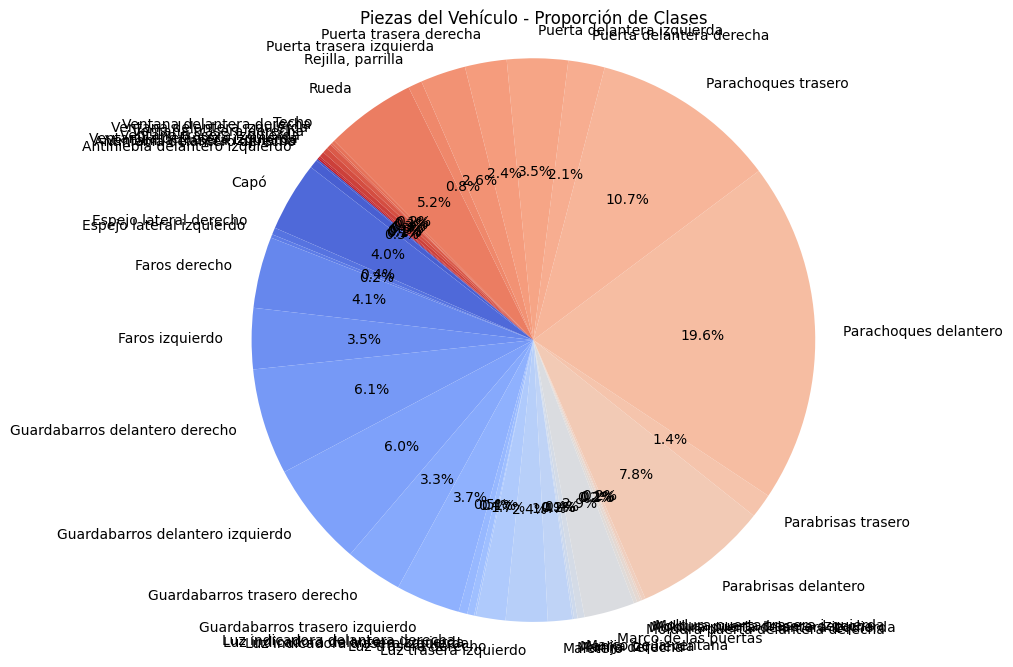

Total etiquetas en Piezas del Vehículo: 1002
Distribución de clases (porcentaje):
  Antiniebla delantero derecho: 1 (0.10%)
  Antiniebla delantero izquierdo: 5 (0.50%)
  Capó: 40 (3.99%)
  Espejo lateral derecho: 4 (0.40%)
  Espejo lateral izquierdo: 2 (0.20%)
  Faros derecho: 41 (4.09%)
  Faros izquierdo: 35 (3.49%)
  Guardabarros delantero derecho: 61 (6.09%)
  Guardabarros delantero izquierdo: 60 (5.99%)
  Guardabarros trasero derecho: 33 (3.29%)
  Guardabarros trasero izquierdo: 37 (3.69%)
  Luz indicadora delantera derecha: 5 (0.50%)
  Luz indicadora delantera izquierda: 4 (0.40%)
  Luz indicadora trasera izquierda: 1 (0.10%)
  Luz trasera derecho: 17 (1.70%)
  Luz trasera izquierdo: 24 (2.40%)
  Maletero: 14 (1.40%)
  Manija derecha: 1 (0.10%)
  Manija izquierda: 2 (0.20%)
  Marco de la ventana: 4 (0.40%)
  Marco de las puertas: 29 (2.89%)
  Moldura puerta delantera derecha: 2 (0.20%)
  Moldura puerta delantera izquierda: 2 (0.20%)
  Moldura puerta trasera derecha: 1 (0.10%)
  Mo

/tmp/ipykernel_32961/1740670170.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette="coolwarm")


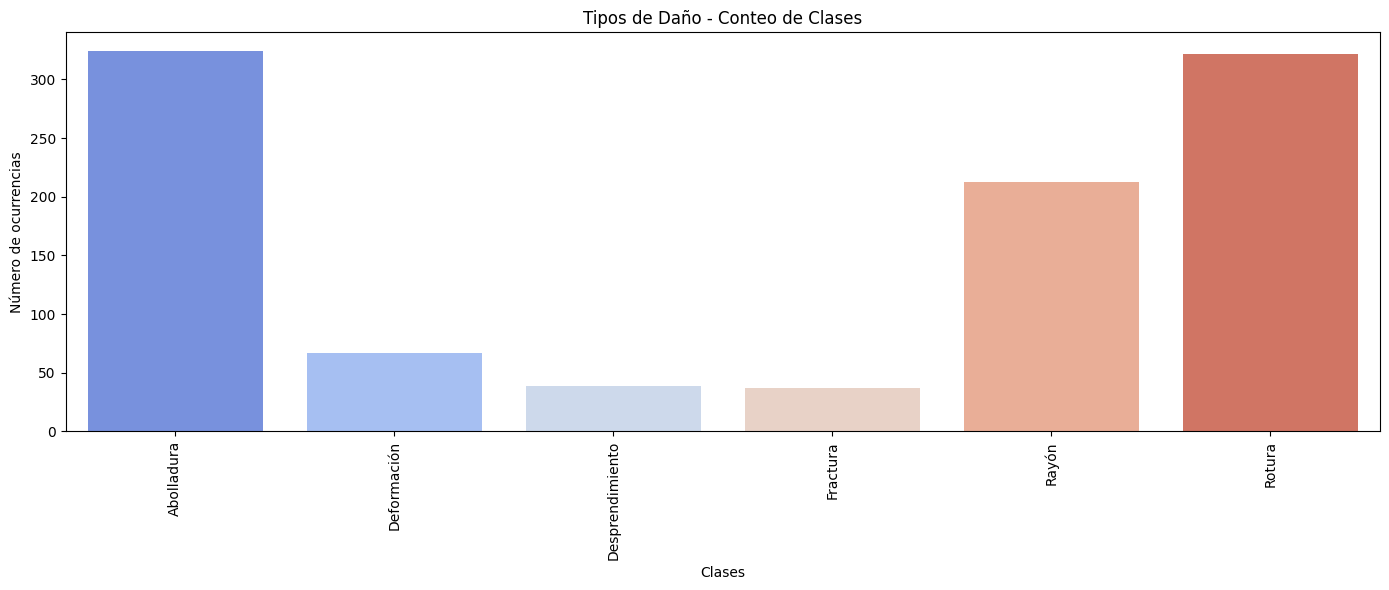

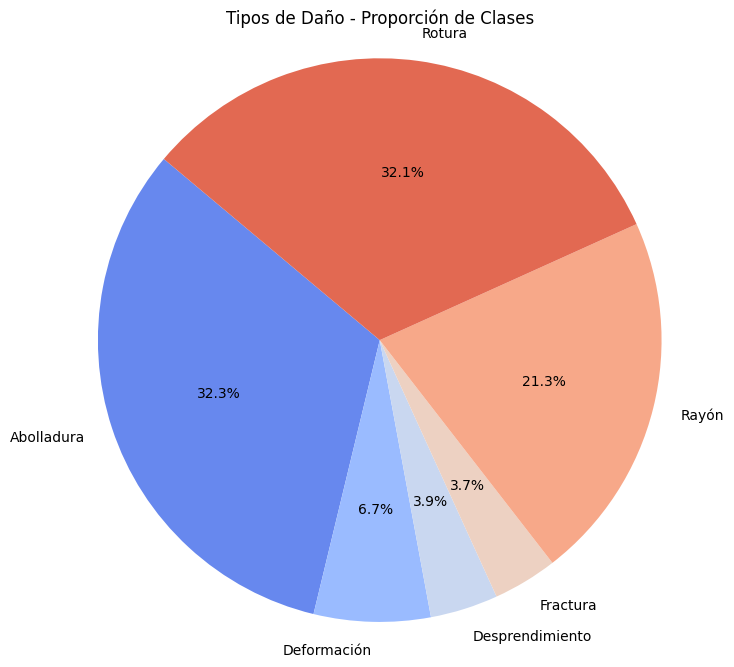

Total etiquetas en Tipos de Daño: 1002
Distribución de clases (porcentaje):
  Abolladura: 324 (32.34%)
  Deformación: 67 (6.69%)
  Desprendimiento: 39 (3.89%)
  Fractura: 37 (3.69%)
  Rayón: 213 (21.26%)
  Rotura: 322 (32.14%)


/tmp/ipykernel_32961/1740670170.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette="coolwarm")


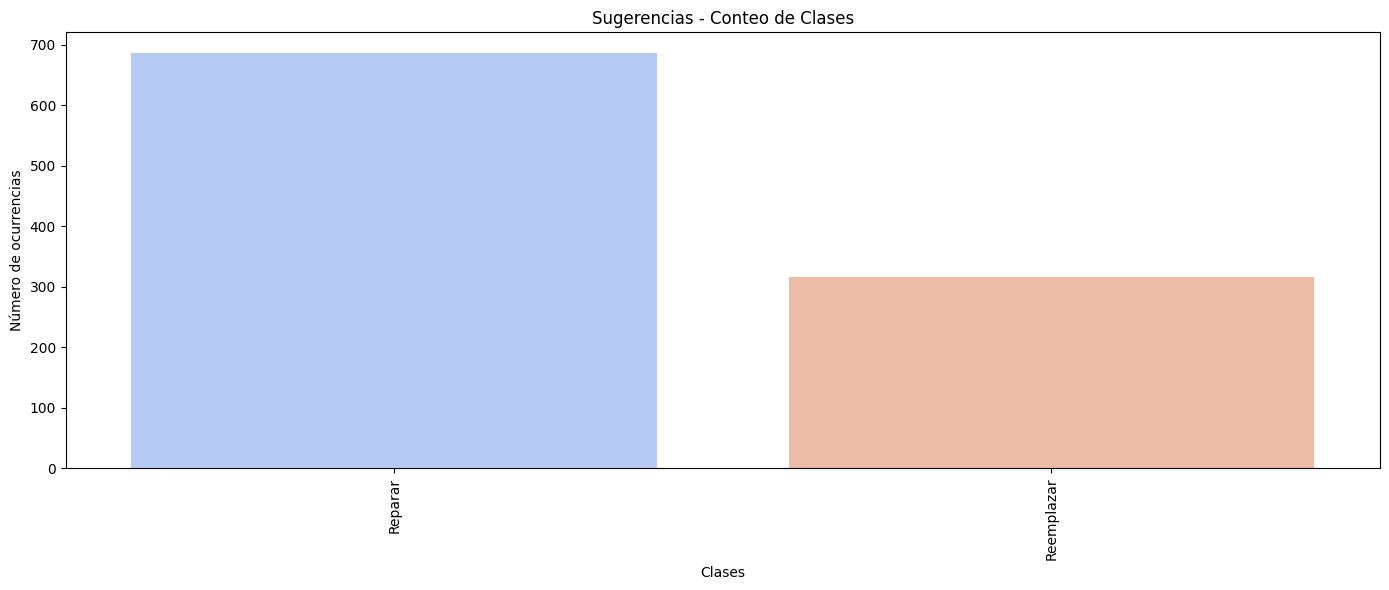

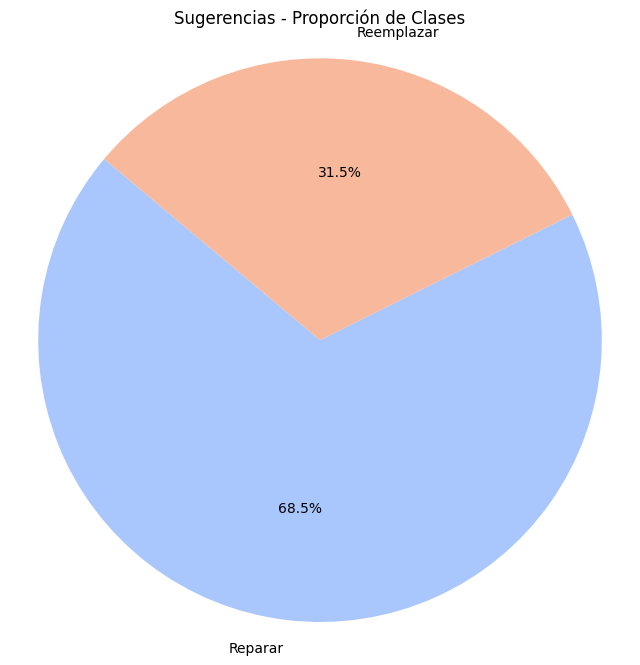

Total etiquetas en Sugerencias: 1002
Distribución de clases (porcentaje):
  Reparar: 686 (68.46%)
  Reemplazar: 316 (31.54%)

Consideraciones para manejo de desbalanceo:
- Técnicas de sobremuestreo (SMOTE, ADASYN)
- Técnicas de submuestreo
- Ajuste de pesos en la función de pérdida
- Uso de métricas adecuadas para datos desbalanceados (F1-score, AUC-PR)


In [28]:
exhaustive_class_distribution_analysis(train_df, label_to_cls_piezas, label_to_cls_danos, label_to_cls_sugerencia)

Análisis de Distribución por Categoría

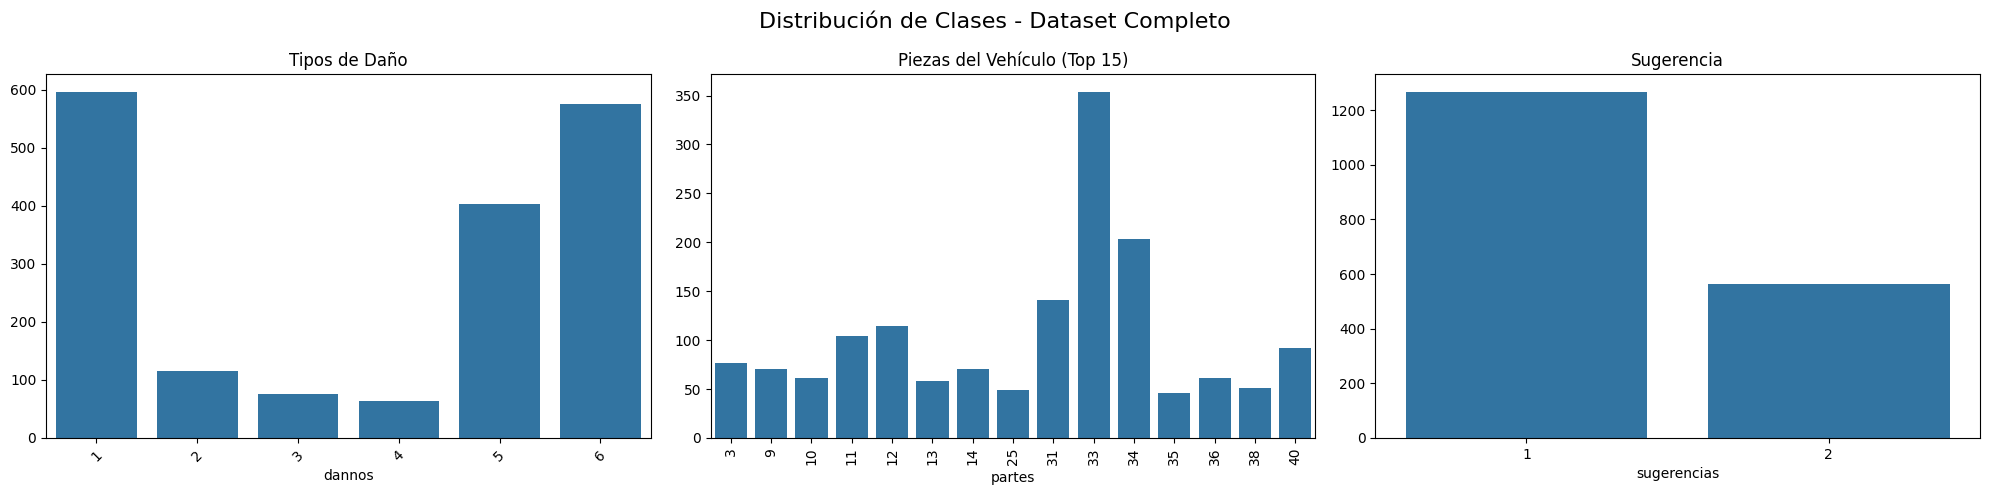


Ratios de Desbalanceo:
Tipos de Daño: 9.33:1
Piezas del Vehículo: 354.00:1
Sugerencia: 2.25:1


In [30]:
def analyze_class_distribution(df, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle(f'Distribución de Clases - {title}', fontsize=16)
    
    # Tipos de Daño
    damage_counts = df['dannos'].value_counts()
    sns.barplot(x=damage_counts.index, y=damage_counts.values, ax=axes[0])
    axes[0].set_title('Tipos de Daño')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Piezas del Vehículo
    part_counts = df['partes'].value_counts()
    sns.barplot(x=part_counts.index[:15], y=part_counts.values[:15], ax=axes[1])  # Top 15
    axes[1].set_title('Piezas del Vehículo (Top 15)')
    axes[1].tick_params(axis='x', rotation=90)
    
    # Sugerencia
    suggestion_counts = df['sugerencias'].value_counts()
    sns.barplot(x=suggestion_counts.index, y=suggestion_counts.values, ax=axes[2])
    axes[2].set_title('Sugerencia')
    
    plt.tight_layout()
    plt.show()
    
    # Cálculo de ratios de desbalanceo
    def calculate_imbalance_ratio(counts):
        return counts.max() / counts.min()
    
    print("\nRatios de Desbalanceo:")
    print(f"Tipos de Daño: {calculate_imbalance_ratio(damage_counts):.2f}:1")
    print(f"Piezas del Vehículo: {calculate_imbalance_ratio(part_counts):.2f}:1")
    print(f"Sugerencia: {calculate_imbalance_ratio(suggestion_counts):.2f}:1")

# Cargar datos consolidados
df_consolidado = pd.read_csv('data/fotos_siniestros/clasificacion_siniestro_partes_dannos_1145_encoded.csv', sep='|')
## df_consolidado = pd.read_csv('data/fotos_siniestros/datasets/multi_val.csv', sep='|')
analyze_class_distribution(df_consolidado, "Dataset Completo")

Análisis de Múltiples Etiquetas por Imagen

---
---
## Matriz de confusion

Solo para ejemplo

In [ ]:
def plot_confusion_matrix_multilabel(y_true, y_pred, class_names):
    for i, class_name in enumerate(class_names):
        cm = confusion_matrix([y[i] for y in y_true], [y[i] for y in y_pred])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
        disp.plot()
        plt.title(f"Matriz de Confusión para clase: {class_name}")
        plt.show()

def multilabel_to_binary_indicator(label_lists, num_classes):
    """
    Convert list of label indices per sample to binary indicator matrix.
    label_lists: list of lists, each inner list contains label indices for a sample
    num_classes: total number of classes
    Returns: numpy array of shape (num_samples, num_classes) with 0/1 indicators
    """
    binary_matrix = np.zeros((len(label_lists), num_classes), dtype=int)
    for i, labels in enumerate(label_lists):
        for label in labels:
            if 0 <= label-1 < num_classes:  # assuming labels start at 1
                binary_matrix[i, label-1] = 1
    return binary_matrix

# Number of damage classes
num_danos = len(label_to_cls_danos)
num_partes = len(label_to_cls_piezas)
num_sugerencia = len(label_to_cls_sugerencia)

# Convert true labels to binary indicator
y_dannos = multilabel_to_binary_indicator(test_df['dannos'], num_danos)
y_partes = multilabel_to_binary_indicator(test_df['partes'], num_partes)
y_sugerencias = multilabel_to_binary_indicator(test_df['sugerencias'], num_sugerencia)

# Class names
class_names_dannos = list(label_to_cls_danos.values())
class_names_partes = list(label_to_cls_piezas.values())
class_names_sugerencias = list(label_to_cls_sugerencia.values())


In [ ]:
plot_confusion_matrix_multilabel(y_sugerencias.tolist(), y_sugerencias.tolist(), class_names_sugerencias)

---
---